## 1. Intro to Machine Learning Models and Scikit-Learn

_____


_This lecture will discuss the basic structure of machine learning models and introduce the `scikit-learn` Python package._

* _Machine learning basics_
    - The structure of a machine-learning model
    - Classes of models
* _Specifying a model in Scikit-Learn_
    - Ingredients: model, fit, predict
    - Example of nearest-neighbor classifier


### 1. The structure of a machine-learning model


---


##### 1.1. The goal of machine learning is to use data to "learn" a relationship between an input and an output:

$$\vec{y} = f(\vec{x})$$

where $f$ is the model, $x$ is the model input and $y$ is the model output.

The model inputs, $\vec{x}$ are often called the **features** of a data point. Sometimes the features are easy to obtain directly from the raw data (e.g. numerical attributes like concentration, temperature, pressure, etc.), but as we will see later in the course extracting features from raw data can be a challenge (e.g. images, audio, etc.). Features are "fingerprints" of raw input data and are often designed to provide interepretability in our model readouts.




Of course representing the model as $f$ is a gross oversimplification. We can specify our model in terms of a set of:

* **parameters**, $\vec{W}$, that define its behavior (e.g. slope, intercept)
* **hyperparameters**, $\vec{\eta}$, that define the structure of the model (e.g. the number of polynomial terms)

Notably, $\vec{W}$ will depend on $\vec{\eta}$. So, we can be a little more specific:

$$\vec{y} = f(\vec{x}, \vec{W}(\vec{\eta}))$$

##### 1.2. How is machine learning different from just solving a regression or optimization problem?

Machine learning seeks to optimize both $\vec{W}$ (parameter optimization) and $\vec{\eta}$ (complexity optimization) in order to obtain a model that *generalizes* to new input data.

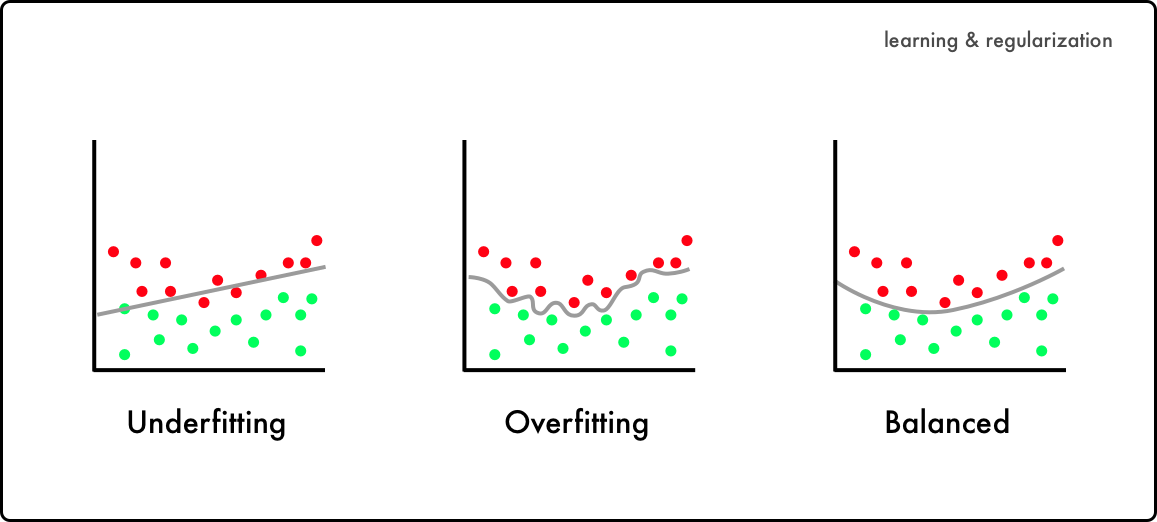

### 2. Classes of machine-learning models

$$\vec{y} = f(\vec{x}, \vec{W}(\vec{\eta}))$$

We can categorize models based on a few criteria:

#### (i) Supervised vs. Unsupervised

In a "supervised" model we have "training data" for $\vec{y}$, meaning that there are examples to define the pattern/relationship we are looking for.

In an "unsupervised" model $\vec{y}$ is determined by the structure of the inputs $\vec{x}$. This is not really intutive given the way $y=f(x)$ is written; another way of thinking about it is that we look for "inherent" patterns in $\vec{x}$ and those are our "outputs".

- **Supervised models:** *(ex: Classification and regression)* Supervised models can be classified by the nature of their outputs. If the output $\vec{y}$ is a continuous variable then it is a *regression* model, while if it is a discrete (boolean, ordinal, integer, etc.) variable then it is considered a *classification* model.

- **Unsupervised models:** *(ex: Dimensionality reduction and clustering)*  There are two main types of unsupervised learning. *Dimensionality reduction* algorithms project high-dimensional (many parameters) inputs ($\vec{x}$) to a lower-dimensional space ($\vec{\tilde{x}}$, where len($\vec{\tilde{x}}$) < len($\vec{x}$)). *Clustering* algorithms assign labels/groups to data points based on similarity metrics. Clustering is like unsupervised classification.

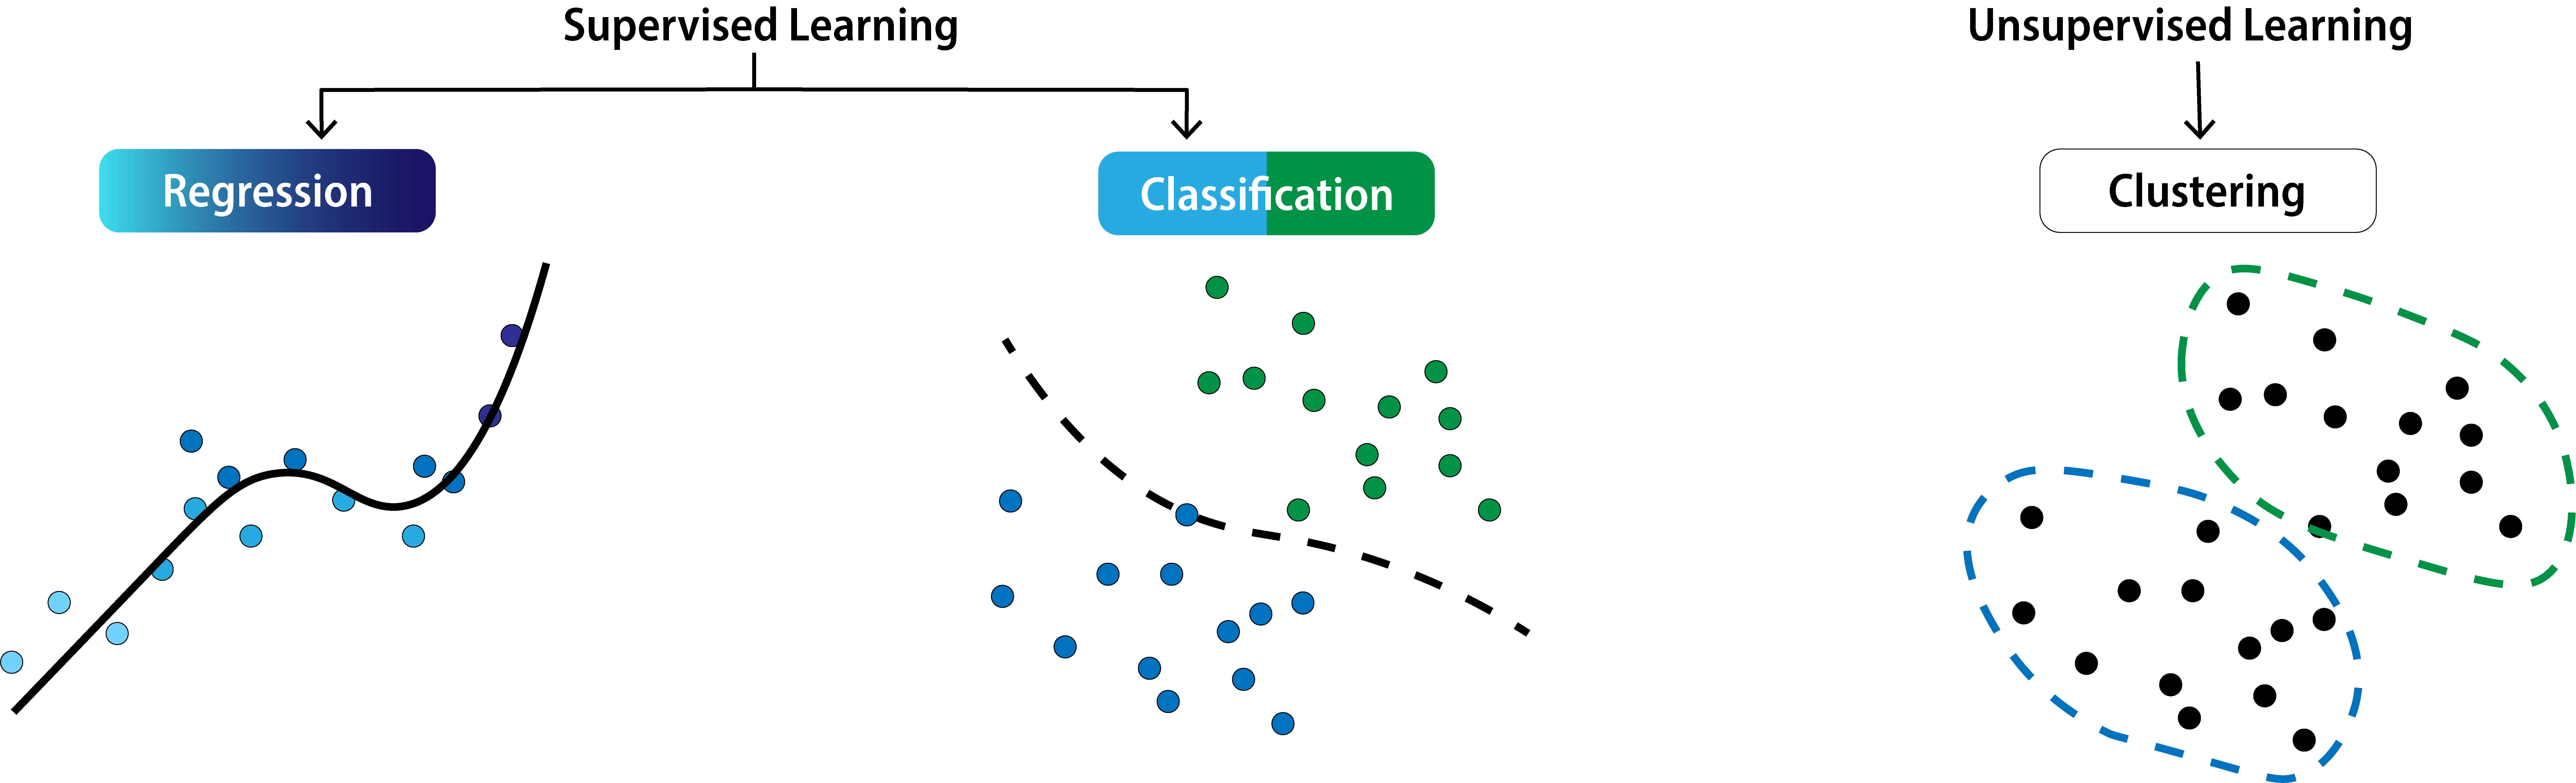

#### 3. Specifying a model in sklearn

[Scikit-learn](https://https://scikit-learn.org/stable/) is a simple and efficent toolbox for data analysis. It provides implementations for various learning algorithms, in a simple and reusable API.

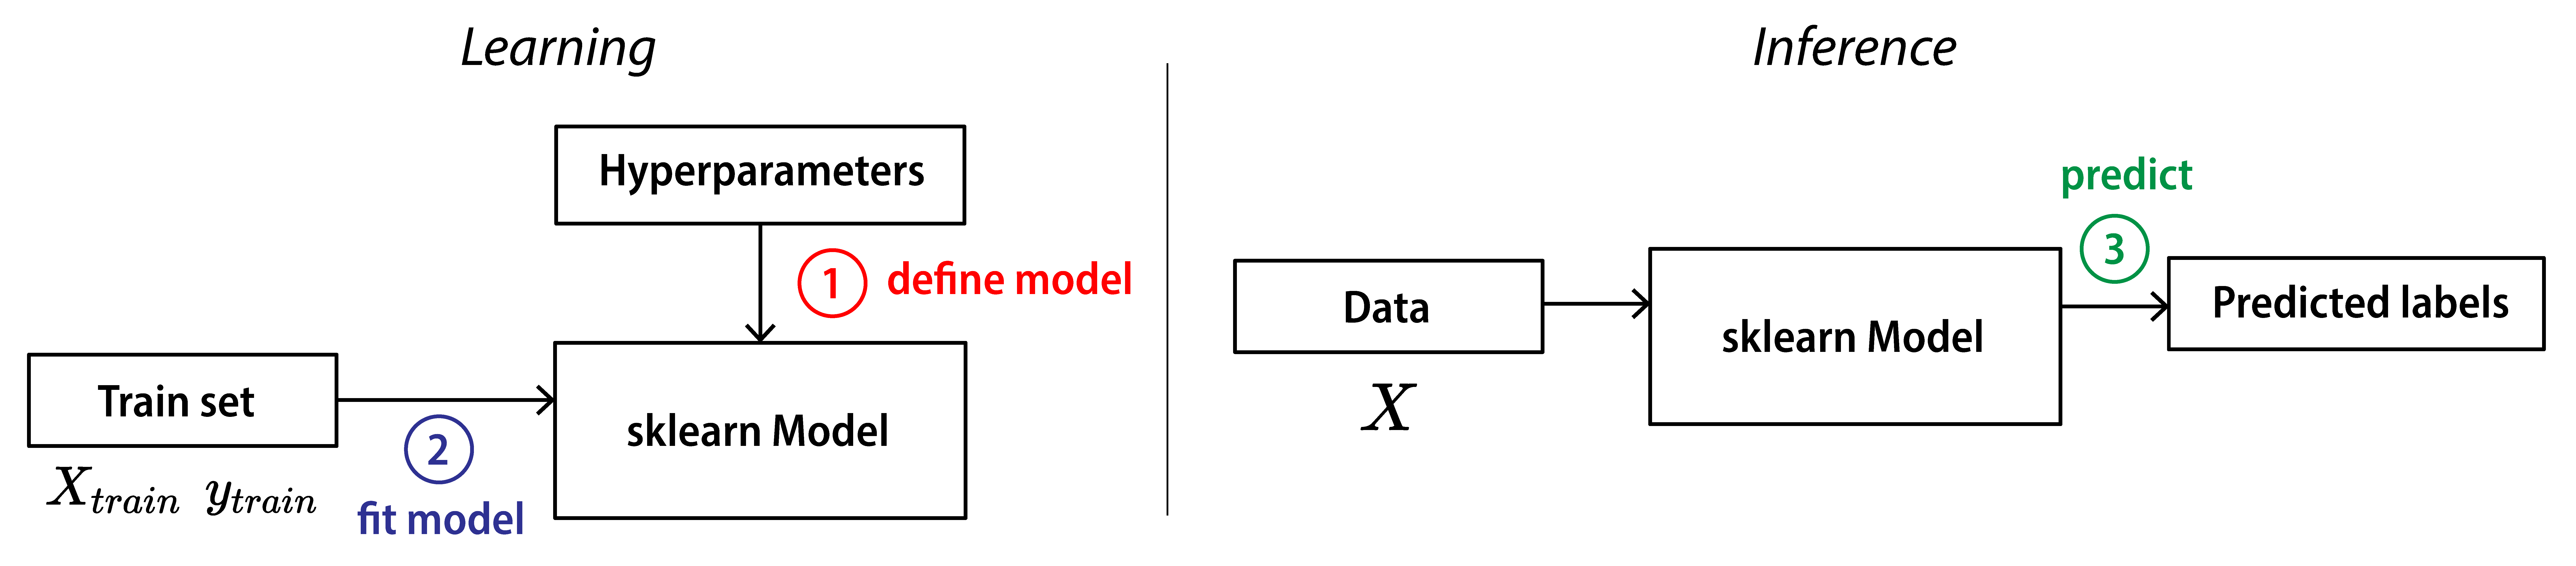

#### 3.1. Creating a model in sklearn

__Ingredients needed for a sklearn model:__
1. _model class and hyperparameters_:
    - `sklearn.linear_model.LinearRegression()`
    - `sklearn.linear_model.Lasso(alpha=0.1)`
    - `sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)`
2. _fit_: train data X, labels y (labels needed for supervised models only)
    - `model.fit(X, y)`
3. _predict_: generates output
    - `model.predict(X_test)`

A list of sklearn supervised learning methods can be found [here](https://scikit-learn.org/stable/supervised_learning.html).


#### 4. Simple example: k-nearest neighbors classifier

Algorithm:
- Input:
     - training data = set of data (X) and labels (y)
     - test data = new point (d-dimensional feature vector)
- Hyperparameters: value of k, metric for computing distance


Please examine the description for `KNeighborsClassifier` in the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In addition to providing the value of k, you can also specify the `algorithm` used to compute the nearest neighbors. These arguments can impact the speed and accuracy of the model. In general, it is recommended to use the default values for non-hyperparameter arguments.


In [15]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

# 1. define model
knnmodel = KNeighborsClassifier(n_neighbors=3)

# 2. fit data
knnmodel.fit(X, y)

# 3. inference / prediction
print('Predicted class for x=1.1 is', knnmodel.predict([[1.6]]))

Predicted class for x=1.1 is [1]


**Challenge:**
- What are the hyperparameters, inputs, outputs, and other optional input arguments for the KNeighborsClassifier above?


> Add your response here!

#### 5. Application of a nearest-neighbor classifier to the Iris dataset

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

##### 5.1 Load and visualize data

The iris dataset has multiple features, we will only take the first two, which correspond to the sepal length and width.

In [17]:
# Load dataset
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features
X = iris.data[:, :2]
y = iris.target

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

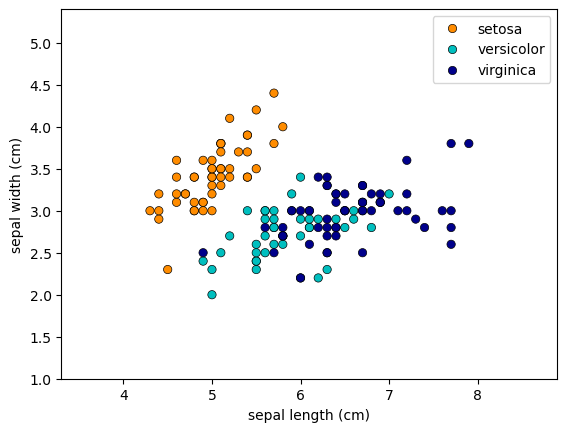

In [19]:
# Plot the training points
def plot_samples(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plot_samples(X, y)

##### 5.2 Fit a knn classifier

In [20]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform', p=1, metric='minkowski')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15, p=1)

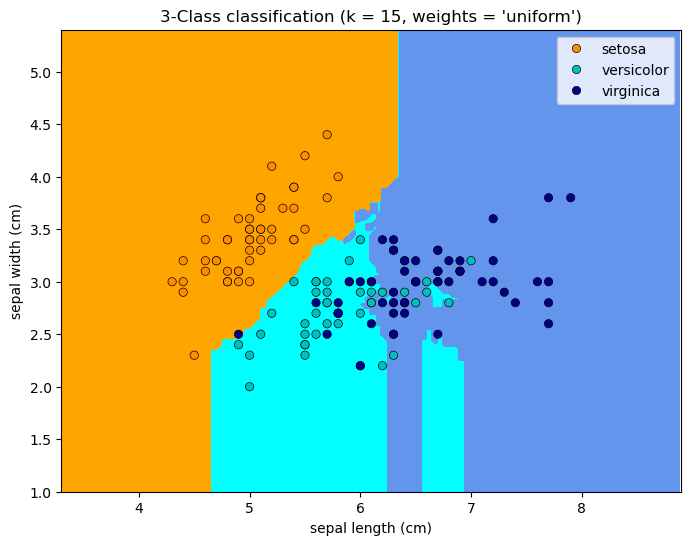

In [21]:
def plot_decision_boundary(clf, X, y):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)


plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X, y)
plot_samples(X, y)
plt.title("3-Class classification (k = 15, weights = 'uniform')")
plt.show()

##### 5.3. Exercise: Play with hyperparameters `n_neighbors` and `weights` and examine how the decision boundaries are changing.

_What are desirable properties for our model?_



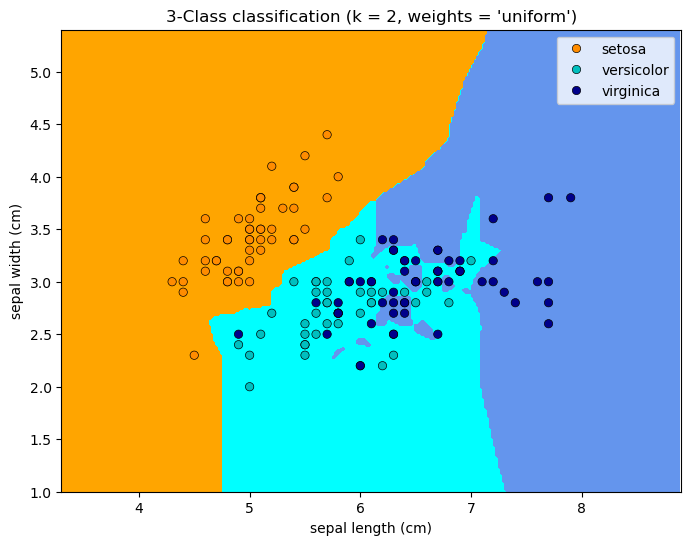

In [22]:
n_neighbors = 2
weights = 'uniform'

clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X, y)
plot_samples(X, y)
plt.title("3-Class classification (k = %d, weights = '%s')" %(n_neighbors, weights))
plt.show()

**Challenge:**

- Find a different classification model in sklearn that you can apply to this dataset. Use matplotlib to visualize both solution spaces in the same figure.

- Compare and contrast the differences between the solution spaces and decision surfaces learned across both models. What are advantages and disadvantages of the two models?


Add your responses here!




In [23]:
# add code here


#### Regression

Now let's try out the simplest regression mode, linear regression! As a reminder, we are fixing the following equation to the input data $x$, $y=mx+b$

In [24]:
# Anscombe's quartet is a famous example of four datasets that have a curious
# property with respect to linear regression
quartet_df = sns.load_dataset("anscombe")

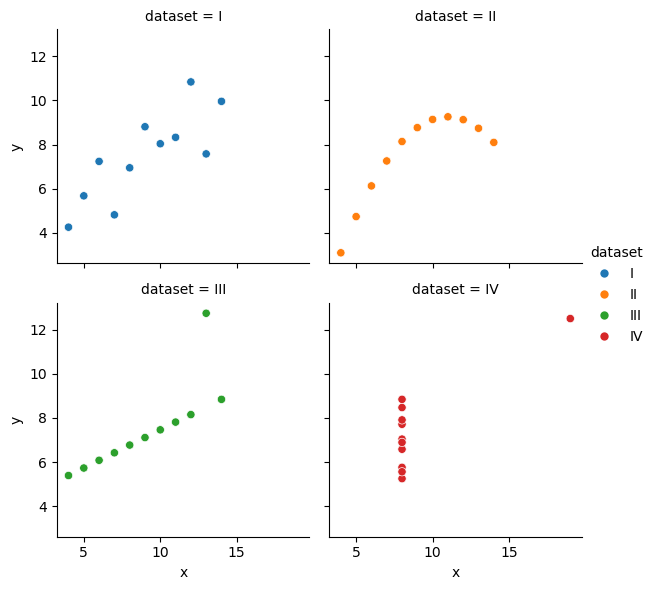

In [25]:
sns.relplot(data=quartet_df,
            x="x",
            y="y",
            kind="scatter",
            col="dataset",
            col_wrap=2,
            height=3,
            aspect=1,
            hue="dataset")

Recall the equation for correlation: $r = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}$, where $x$ and $y$ are data vectors of length $n$ and $\bar{x}$ and $\bar{y}$ are the sample averages.


In [26]:
# here are the correlation values for each dataset, this uses some handy
# built-in functions in pandas, namely corr(), which returns the full correlation
# matrix (Pearson) within each group and iloc, which enables fancy indexing into the result...
quartet_df.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [27]:
# this uses fancy indexing to slice to only the result we care about
# (the correlation between x and y)
quartet_df.groupby("dataset").corr().iloc[::2,1]

dataset   
I        x    0.816421
II       x    0.816237
III      x    0.816287
IV       x    0.816521
Name: y, dtype: float64

**Challenge:**

- Use scikit learn to fit each of the Anscombe datasets with linear regression (use the `model.fit` function with default arguments). Recall that linear regression can be found at `sklearn.linear_model.LinearRegression()`. Plot both the original data and the line of best fit.

- In your own words describe what is happening and why (hint: think about the Pearson correlation values above and how they arise from the equation for Pearson correlation)


In [28]:
# add code here

add words here!